## Production Allocation Efficiency in an Edgeworth Box

## The social planner's problem

Consider a small-open economy with two production sectors -- agriculture and manufacturing -- with production in each sector taking place with constant returns to scale production functions.  Regardless of the specific shape of a planners social utility function over final consumption bundles the planner will want to maximize income at world prices and then use world trade and redistribution to maximize social welfare.  The planner hence chooses capital and labor allocations across sectors to maximize national income at world prices:

$$\max_{K_A, K_M, L_A, L_M}  p_A F(K_A, L_A) + p_M F(K_M, L_M) $$

subject to the two factor resource constraints: 

$$K_A + K_M \leq \bar K$$

$$L_A + L_M \leq \bar L$$ 

There are two sectors agriculure and manufacturing. Production in each sector takes place using a linear homogenous production function.

## Edgeworth Box plots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed

In [2]:
ALPHA = 0.2   # capital share in agriculture
BETA = 0.8   # 

KBAR = 100
LBAR = 100

p = 1      # =Pa/Pm  relative price of ag goods

def F(K,L,alpha=ALPHA):
    """Agriculture Production function"""
    return (K**alpha)*(L**(1-alpha))

def G(K,L,beta=BETA):
    """Manufacturing Production function"""
    return (K**beta)*(L**(1-beta))

def budgetc(c1, p1, p2, I):
    return (I/p2)-(p1/p2)*c1

def isoq(L, Q, mu):
    return (Q/(L**(1-mu)))**(1/mu)

In [3]:
def edgeworth(L, Kbar=KBAR, Lbar=LBAR,alpha=ALPHA, beta=BETA):
    """efficiency locus: """
    a = (1-alpha)/alpha
    b = (1-beta)/beta
    return b*L*Kbar/(a*(Lbar-L)+b*L)

In [4]:
def edgeplot(LA,Kbar=KBAR, Lbar=LBAR,alpha=ALPHA,beta=BETA):
    """Draw an edgeworth box
    
    arguments:
    LA -- labor allocated to ag, from which calculate QA(Ka(La),La) 
    """
    KA = edgeworth(LA, Kbar, Lbar,alpha, beta)
    RTS = (alpha/(1-alpha))*(KA/LA)
    QA = F(KA,LA,alpha)
    QM = G(Kbar-KA,Lbar-LA,beta)
    print("(LA,KA)=({:4.1f}, {:4.1f})  (QA, QM)=({:4.1f}, {:4.1f})  RTS={:4.1f}"
          .format(LA,KA,QA,QM,RTS))
    La = np.arange(1,Lbar)
    fig, ax = plt.subplots(figsize=(7,6))
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, Kbar)
    ax.plot(La, edgeworth(La,Kbar,Lbar,alpha,beta),'k-')
    #ax.plot(La, La,'k--')
    ax.plot(La, isoq(La, QA, alpha))
    ax.plot(La, Kbar-isoq(Lbar-La, QM, beta),'g-')
    ax.plot(LA, KA,'ob')
    ax.vlines(LA,0,KA, linestyles="dashed")
    ax.hlines(KA,0,LA, linestyles="dashed")
    ax.text(-6,-6,r'$O_A$',fontsize=16)
    ax.text(Lbar,Kbar,r'$O_M$',fontsize=16)
    ax.set_xlabel(r'$L_A -- Labor$', fontsize=16)
    ax.set_ylabel('$K_A - Capital$', fontsize=16)
    plt.show()

In [5]:
def ppf(LA,Kbar=KBAR, Lbar=LBAR,alpha=ALPHA,beta=BETA):
    """Draw a production possibility frontier
    
    arguments:
    LA -- labor allocated to ag, from which calculate QA(Ka(La),La) 
    """
    KA = edgeworth(LA, Kbar, Lbar,alpha, beta)
    RTS = (alpha/(1-alpha))*(KA/LA)
    QA = F(KA,LA,alpha)
    QM = G(Kbar-KA,Lbar-LA,beta)
    La = np.arange(1,Lbar)
    Ka = edgeworth(La, Kbar, Lbar,alpha, beta)
    Qa = F(Ka,La,alpha)
    Qm = G(Kbar-Ka,Lbar-La,beta)
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, Kbar)
    ax.plot(Qa, Qm,'k-')
    plt.show()

It's interesting to note that for Cobb-Douglas technologies you really need quite a difference in capital-intensities between the two technologies in order to get much curvature to the production function.

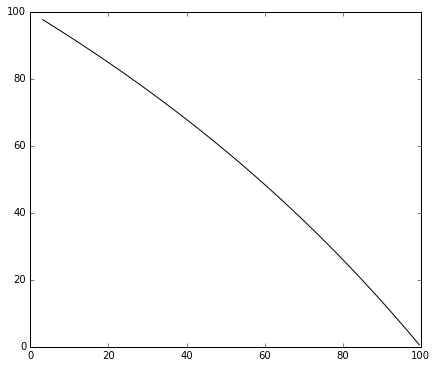

In [6]:
fig, ax = plt.subplots(figsize=(7,6))
ppf(50,alpha =0.7, beta=0.3)

Here is and Edgeworth Box depicting the situation where $L_A = 50$ units of labor are allocated to the agricultural sector and all other allocations are efficient (along the efficiency locus).

(LA,KA)=(50.0,  5.9)  (QA, QM)=(32.6, 82.9)  RTS= 0.0


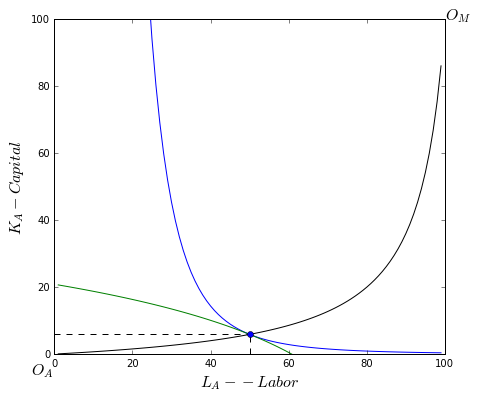

In [7]:
edgeplot(50)

If you're using a jupyter server you can interact with the following plot, changing the technology parameters and initial allocation.

In [8]:
LA = 50
interact(edgeplot,LA=(10,Lbar-10,1), Kbar=fixed(KBAR),Lbar=fixed(LBAR),alpha=(0.1,0.9,0.1),beta=(0.1,0.9,0.1))

NameError: name 'Lbar' is not defined